#### **DISTILBERT**
DistilBERT is a smaller, faster, and lighter version of the BERT (Bidirectional Encoder Representations from Transformers) model, designed to provide similar performance with reduced computational requirements. It was introduced by Hugging Face as a way to make BERT's powerful natural language processing capabilities more accessible in resource-constrained environments.

##### **Key Features of DistilBERT:**

Smaller Size: 40% fewer parameters than BERT, with 97% of its performance.
Faster Speed: 60% faster inference, ideal for real-time tasks.
Knowledge Distillation: Trained to mimic BERT’s behavior using soft labels.
Applications: Sentiment analysis, text classification, question answering, and more.
Efficiency: Lightweight, memory-efficient, and suitable for deployment on edge devices.
Open-Source: Available via Hugging Face Transformers.

In [2]:
import pandas as pd
df = pd.read_csv("final.csv", low_memory=False)
df.head()

,Sl no,Name,Profile ID,Comment,Comment_Tokens,comment_length,word_count,sentiment_score,sentiment_class
0,1,scotty2jatty,398274122,you better do dirty,"better,dirty",19,4,0,neutral
1,2,angelasanders975,65963290409,thats soooooooooo right,"thats,soooooooooo,right",23,3,0,neutral
2,3,myleslewis_24,11687291106,bro i want that shirt,"bro,want,shirt",21,5,1,positive
3,4,miladheydarpour1369,7529960718,good,good,4,1,3,positive
4,5,matthew_williams224,25240207448,bro he only needs to beat jakes ass,"bro,needs,beat,jakes,ass",35,8,-7,negative


In [3]:
df.head()

,Sl no,Name,Profile ID,Comment,Comment_Tokens,comment_length,word_count,sentiment_score,sentiment_class
0,1,scotty2jatty,398274122,you better do dirty,"better,dirty",19,4,0,neutral
1,2,angelasanders975,65963290409,thats soooooooooo right,"thats,soooooooooo,right",23,3,0,neutral
2,3,myleslewis_24,11687291106,bro i want that shirt,"bro,want,shirt",21,5,1,positive
3,4,miladheydarpour1369,7529960718,good,good,4,1,3,positive
4,5,matthew_williams224,25240207448,bro he only needs to beat jakes ass,"bro,needs,beat,jakes,ass",35,8,-7,negative


In [4]:
df.isnull().sum()

Sl no              0
Name               0
Profile ID         0
Comment            0
Comment_Tokens     8
comment_length     0
word_count         0
sentiment_score    0
sentiment_class    0
dtype: int64

In [5]:
df.head(15)

,Sl no,Name,Profile ID,Comment,Comment_Tokens,comment_length,word_count,sentiment_score,sentiment_class
0,1,scotty2jatty,398274122,you better do dirty,"better,dirty",19,4,0,neutral
1,2,angelasanders975,65963290409,thats soooooooooo right,"thats,soooooooooo,right",23,3,0,neutral
2,3,myleslewis_24,11687291106,bro i want that shirt,"bro,want,shirt",21,5,1,positive
3,4,miladheydarpour1369,7529960718,good,good,4,1,3,positive
4,5,matthew_williams224,25240207448,bro he only needs to beat jakes ass,"bro,needs,beat,jakes,ass",35,8,-7,negative
5,6,dunnett.kay,1131369548,good,good,4,1,3,positive
6,7,vremyatherapper,3178599909,on mike tko,"mike,tko",11,3,0,neutral
7,8,pkkw777,6329500566,the tshirt though,"tshirt,though",17,3,0,neutral
8,9,schnopp77,5894239800,yeah boy tysons gonna get shit done the goat,"yeah,boy,tysons,gon,na,get,shit,done,goat",44,9,-3,negative
9,10,kryztaf0,49921246899,please win mike,"please,win,mike",15,3,5,positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5089 entries, 0 to 5088
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sl no            5089 non-null   int64 
 1   Name             5089 non-null   object
 2   Profile ID       5089 non-null   int64 
 3   Comment          5089 non-null   object
 4   Comment_Tokens   5081 non-null   object
 5   comment_length   5089 non-null   int64 
 6   word_count       5089 non-null   int64 
 7   sentiment_score  5089 non-null   int64 
 8   sentiment_class  5089 non-null   object
dtypes: int64(5), object(4)
memory usage: 357.9+ KB


In [7]:
# Define a mapping dictionary for sentiment classes
sentiment_mapping = {
    'neutral': 1,
    'positive': 1,
    'negative': 0
}

# Apply the mapping to the 'sentiment_class' column to create a numerical 'sentiment_label'
df['sentiment_label'] = df['sentiment_class'].map(sentiment_mapping)

# Display the first few rows to confirm
print(df[['sentiment_label', 'sentiment_class']].head())

   sentiment_label sentiment_class
0                1         neutral
1                1         neutral
2                1        positive
3                1        positive
4                0        negative


In [9]:
df['sentiment_class'] = df['sentiment_class'].replace('neutral', 'positive')

In [10]:
df = df[['Comment', 'sentiment_score', 'sentiment_label', 'sentiment_class']]
df.head()

,Comment,sentiment_score,sentiment_label,sentiment_class
0,you better do dirty,0,1,positive
1,thats soooooooooo right,0,1,positive
2,bro i want that shirt,1,1,positive
3,good,3,1,positive
4,bro he only needs to beat jakes ass,-7,0,negative


In [11]:
df.isnull().sum()

Comment            0
sentiment_score    0
sentiment_label    0
sentiment_class    0
dtype: int64

In [12]:
df.dtypes

Comment            object
sentiment_score     int64
sentiment_label     int64
sentiment_class    object
dtype: object

In [13]:
import os
import numpy as np
import shutil
import tarfile
import tensorflow as tf
from transformers import DistilBertTokenizer,DistilBertForSequenceClassification
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import defaultdict

# Force TensorFlow to use the CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disables GPU

# Check if TensorFlow is using CPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Using Device: ", tf.config.experimental.list_physical_devices('CPU'))




2025-02-04 14:00:16.481659: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 14:00:25.548168: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0
Using Device:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [14]:
import transformers
from transformers import AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings('ignore')

# Force PyTorch to use CPU
device = torch.device('cpu')

# Verify the device being used
print(f"Using device: {device}")

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model = model.to(device)  # Move model to CPU


Using device: cpu


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
df['sentiment_class'].value_counts()

positive    2684
negative    2405
Name: sentiment_class, dtype: int64

In [16]:
df.head(15)

,Comment,sentiment_score,sentiment_label,sentiment_class
0,you better do dirty,0,1,positive
1,thats soooooooooo right,0,1,positive
2,bro i want that shirt,1,1,positive
3,good,3,1,positive
4,bro he only needs to beat jakes ass,-7,0,negative
5,good,3,1,positive
6,on mike tko,0,1,positive
7,the tshirt though,0,1,positive
8,yeah boy tysons gonna get shit done the goat,-3,0,negative
9,please win mike,5,1,positive


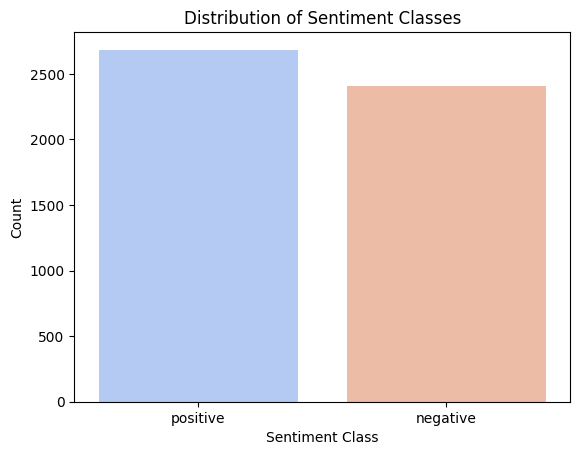

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot to visualize sentiment distribution
sns.countplot(x='sentiment_class', data=df, palette='coolwarm')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

In [17]:
# Set the model name
MODEL_NAME = 'distilbert-base-uncased'


tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)

In [31]:
# Some of the common distiBERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [32]:
MAX_LEN = 150

In [33]:
#new

from torch.utils.data import Dataset
import torch

class InstaComments(Dataset):
    # Constructor Function 
    def __init__(self, comments, targets, tokenizer, max_len):
        self.comments = comments  
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.comments) 
        
    # Get item magic method
    def __getitem__(self, item):
        comment = str(self.comments[item])  
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer(
            comment,  
            add_special_tokens=True,  
            max_length=self.max_len,  
            truncation=True,
            padding='max_length',  
            return_token_type_ids=False,  
            return_attention_mask=True,  
            return_tensors='pt', 
        )
        
        # Convert the output into the required format
        return {
            'comment_text': comment,  # The raw comment text
            'input_ids': encoding['input_ids'].flatten(),  # Flatten input_ids
            'attention_mask': encoding['attention_mask'].flatten(),  # Flatten attention_mask
            'targets': torch.tensor(target, dtype=torch.long)  # Target label (converted to tensor)
        }


#### **DATA SPLITTING**

In [34]:
#NEW
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Split the data into training and test sets (80% train, 20% test) while preserving the sentiment distribution
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED, stratify=df['sentiment_class'])

# Split the test set into validation and test sets (50% validation, 50% test) while preserving the sentiment distribution
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED, stratify=df_test['sentiment_class'])

# Check the shape of each split to ensure the data has been divided as expected
print(f"Training set shape: {df_train.shape}")
print(f"Validation set shape: {df_val.shape}")
print(f"Test set shape: {df_test.shape}")


Training set shape: (4071, 4)
Validation set shape: (509, 4)
Test set shape: (509, 4)


#### **DATA LOADER**

In [38]:
from torch.utils.data import DataLoader

def create_data_loader(df, tokenizer, max_len, batch_size):

    ds = InstaComments(
        comments=df['Comment'].to_numpy(), 
        targets=df['sentiment_label'].to_numpy(),  
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0  
        )



#### **DATA LOADERS**

In [39]:
#NEW
BATCH_SIZE = 32
# Create the train, validation, and test data loaders
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

# Check the first batch of the training data loader
for batch in train_data_loader:
    print("Input IDs:", batch['input_ids'].shape)  
    print("Attention Mask:", batch['attention_mask'].shape) 
    print("Targets:", batch['targets'].shape)  
    break


Input IDs: torch.Size([32, 150])
Attention Mask: torch.Size([32, 150])
Targets: torch.Size([32])


In [65]:
# Examples 
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

dict_keys(['comment_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([32, 150])
torch.Size([32, 150])
torch.Size([32])


SENTIMENT CLASSIFICATION USING BERT

In [44]:
distilbert_model = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
#NEW

import torch
import torch.nn as nn
from transformers import DistilBertModel

class SentimentClassifier(nn.Module):
    
    # Constructor method 
    def __init__(self, n_classes, model_name=MODEL_NAME):
        super(SentimentClassifier, self).__init__()
        
        # Load the pre-trained DistilBERT model
        self.distilbert = DistilBertModel.from_pretrained(model_name)
        
        # Dropout layer to prevent overfitting
        self.drop = nn.Dropout(p=0.3)
        
        # Output layer for classification (mapping to n_classes)
        self.out = nn.Linear(self.distilbert.config.hidden_size, n_classes)
        
    def forward(self, input_ids, attention_mask):
        # DistilBERT model returns the outputs with the last_hidden_state
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract the representation of the [CLS] token (first token) from last hidden state
        cls_token_output = outputs.last_hidden_state[:, 0, :]
        
        # Apply dropout for regularization
        output = self.drop(cls_token_output)
        
        # Pass through the final classification layer
        return self.out(output)


#### **MOVE TO CLASSIFFIER**

In [42]:
#NEW
# In the training loop, make sure inputs are moved to the same device as the model
for batch in train_data_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    targets = batch['targets'].to(device)
    
    # Forward pass
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    
    
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_names = ['negative', 'positive']
model = SentimentClassifier(len(class_names))

model = model.to(device)

print(f"Model is being used on: {device}")


Model is being used on: cpu


In [45]:
print(distilbert_model.config.hidden_size)

768


#### **Optimizer Setup (AdamW)**

In [46]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

#### **Learning Rate Scheduler**

In [47]:
from transformers import AdamW, get_linear_schedule_with_warmup
import torch.nn as nn

# Number of iterations 
EPOCHS = 3

# Optimizer AdamW
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

# Total number of training steps
total_steps = len(train_data_loader) * EPOCHS

warmup_steps = int(0.1 * total_steps)

# Learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)

# Loss function for classification
loss_fn = nn.CrossEntropyLoss().to(device)


In [48]:
#NEW
import torch
import numpy as np
import torch.nn as nn

# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        # Move data to device
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        
        # Get predictions and compute loss
        _, preds = torch.max(outputs, dim=1) 
        loss = loss_fn(outputs, targets)  
        
        # Track correct predictions and loss
        correct_predictions += torch.sum(preds == targets)  
        losses.append(loss.item())  
        # Backward pass
        loss.backward()
        
        # Gradient clipping to prevent explosion of gradients
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Optimization step
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()  
    
    # Return the accuracy and the average loss
    return correct_predictions.double() / n_examples, np.mean(losses)


In [49]:
##NEW
import torch.nn.functional as F  

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()  # Set the model to evaluation mode
    
    losses = []
    correct_predictions = 0
    all_preds = []  # To store predicted probabilities for AUC/ROC calculation
    all_labels = []  # To store true labels for AUC/ROC calculation
    
    # Disable gradient computation
    with torch.no_grad():
        for d in data_loader:
            # Get the inputs and targets, move to the appropriate device
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)  
            
            # Forward pass to get model outputs (logits)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            
            # Apply softmax to get probabilities (for AUC/ROC)
            probs = F.softmax(outputs, dim=1) 
            
            # Get predictions from the output probabilities (for accuracy)
            _, preds = torch.max(probs, dim=1)
            
            # Calculate the loss
            loss = loss_fn(outputs, targets)
            
            # Track correct predictions
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
            # Collect all predicted probabilities and true labels for AUC/ROC
            all_preds.append(probs.cpu().numpy())  
            all_labels.append(targets.cpu().numpy()) 
    # Concatenate all predictions and true labels for AUC computation
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    # Return accuracy, average loss, predicted probabilities, and true labels
    return correct_predictions.double() / n_examples, np.mean(losses), all_preds, all_labels


In [50]:
#NEW
from collections import defaultdict

# Track training history
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    # Show details
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 3)
    
    # Training phase
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss: {train_loss:.4f} | accuracy: {train_acc:.4f}")
    
 
    val_acc, val_loss, val_preds, val_labels = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
    )
    
    print(f"Val loss: {val_loss:.4f} | accuracy: {val_acc:.4f}")
    print()
    
    # Save training history
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    

Epoch 1/3
---
Train loss: 0.3498 | accuracy: 0.8344
Val loss: 0.1630 | accuracy: 0.9312

Epoch 2/3
---
Train loss: 0.1134 | accuracy: 0.9595
Val loss: 0.2032 | accuracy: 0.9253

Epoch 3/3
---
Train loss: 0.0379 | accuracy: 0.9887
Val loss: 0.2318 | accuracy: 0.9273



"  # Save model if validation accuracy improves\n    if val_acc > best_accuracy:\n        torch.save(model.state_dict(), 'distilbert_model.bin')\n        best_accuracy = val_acc\n\n"

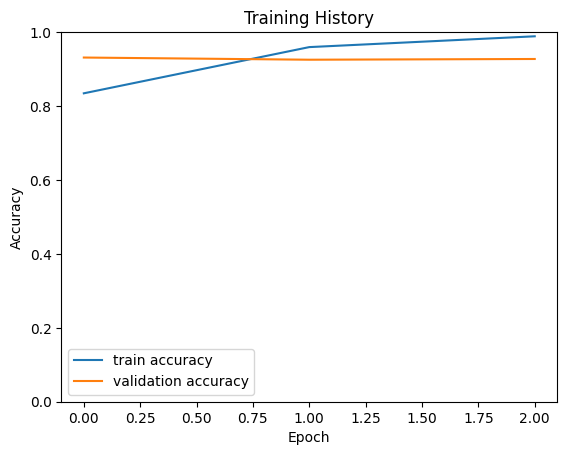

In [51]:
import matplotlib.pyplot as plt  

# Plot training and validation accuracy
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

# Set graph attributes
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.ylim([0, 1])

plt.show()


In [52]:
# Evaluate model on test data
test_acc, test_loss, test_preds, test_labels = eval_model(
    model=model,
    data_loader=test_data_loader,
    loss_fn=loss_fn,
    device=device,
    n_examples=len(df_test)  
)

# Convert accuracy tensor to scalar
test_accuracy = test_acc.item()

# Print results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9430
Test Loss: 0.2083


              precision    recall  f1-score   support

    negative       0.92      0.97      0.94       241
    positive       0.97      0.92      0.94       268

    accuracy                           0.94       509
   macro avg       0.94      0.94      0.94       509
weighted avg       0.94      0.94      0.94       509



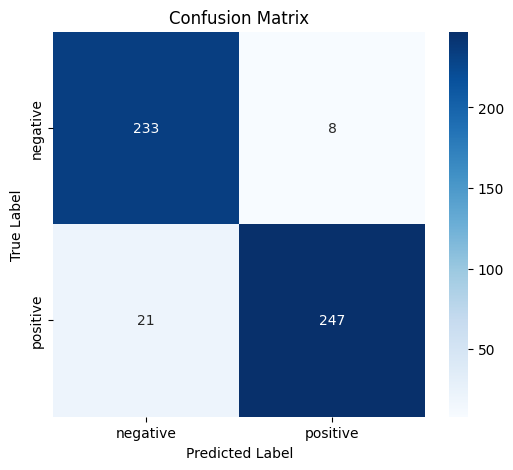

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert test predictions to class labels
test_pred_labels = np.argmax(test_preds, axis=1)

# Generate classification report
print(classification_report(test_labels, test_pred_labels, target_names=['negative', 'positive']))

# Confusion matrix
cm = confusion_matrix(test_labels, test_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


AUC Score: 0.9855


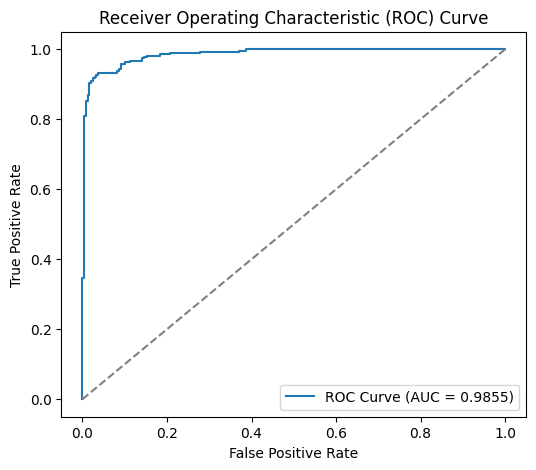

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute AUC score
auc_score = roc_auc_score(test_labels, test_preds[:, 1])  
print(f"AUC Score: {auc_score:.4f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(test_labels, test_preds[:, 1])

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


#### **F1 REPORT**

In [55]:
from sklearn.metrics import classification_report
import torch

# Evaluate model on test data to get predictions
def get_predictions(model, data_loader, device):
    model = model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            
           
            all_preds.extend(preds.cpu().numpy())  
            all_labels.extend(targets.cpu().numpy())  
    
    return all_preds, all_labels


predictions, true_labels = get_predictions(model, test_data_loader, device)

# Generate classification report
report = classification_report(true_labels, predictions, target_names=['negative','positive'])
print(report)


              precision    recall  f1-score   support

    negative       0.92      0.97      0.94       241
    positive       0.97      0.92      0.94       268

    accuracy                           0.94       509
   macro avg       0.94      0.94      0.94       509
weighted avg       0.94      0.94      0.94       509



In [56]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    roc_auc_score,
    mean_absolute_error,
    mean_squared_error
)
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd


accuracy, loss, all_preds, all_labels = eval_model(model, test_data_loader, loss_fn, device, len(df_test))

# Ensure all_labels is 1D
if all_labels.ndim > 1:
    all_labels = np.argmax(all_labels, axis=1)

# Get unique classes
unique_classes = np.unique(all_labels)


if len(unique_classes) == 2:
    
    auc_roc = roc_auc_score(all_labels, all_preds[:, 1])
else:
    
    all_labels_binarized = label_binarize(all_labels, classes=unique_classes)
    auc_roc = roc_auc_score(all_labels_binarized, all_preds, multi_class='ovr', average='weighted')

# Calculate predictions from probabilities
predictions = np.argmax(all_preds, axis=1)

# Calculate metrics
precision = precision_score(all_labels, predictions, average='weighted', labels=np.unique(predictions))
accuracy = accuracy_score(all_labels, predictions)
mae = mean_absolute_error(all_labels, predictions)
mse = mean_squared_error(all_labels, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((all_labels - predictions) / (all_labels + 1e-10))) * 100

# Prepare the results in a tabular format
metrics = {
    "Metric": ["AUC/ROC", "Precision", "Accuracy", "MAE", "MSE", "RMSE", "MAPE"],
    "Value": [auc_roc, precision, accuracy, mae, mse, rmse, mape]
}

metrics_df = pd.DataFrame(metrics)

# Print the results as a table
print(metrics_df)


      Metric         Value
0    AUC/ROC  9.855081e-01
1  Precision  9.443359e-01
2   Accuracy  9.430255e-01
3        MAE  5.697446e-02
4        MSE  5.697446e-02
5       RMSE  2.386932e-01
6       MAPE  1.571709e+10


In [57]:
import torch

def predict_multiple(model, tokenizer, sentences, max_len, device):
    model = model.eval() 
    predictions = []
    
    
    for sentence in sentences:
        
        inputs = tokenizer.encode_plus(
            sentence,  
            add_special_tokens=True,  
            max_length=max_len,  
            truncation=True,
            padding='max_length',  
            return_attention_mask=True,  
            return_token_type_ids=False,  
            return_tensors='pt'  
        )

        
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        
        
        with torch.no_grad():
            output = model(input_ids=input_ids, attention_mask=attention_mask)
        
        
        _, prediction = torch.max(output, dim=1)

        
        class_names = ['negative', 'positive']  
        predicted_class = class_names[prediction.item()]
        
        
        predictions.append((sentence, predicted_class))
    
    return predictions


while True:
    print("Enter a comment (or type 'exit' to quit):")
    user_input = input()
    
    if user_input.lower() == 'exit':
        break
    
    # Predict sentiment for the input comment
    predictions = predict_multiple(model, tokenizer, [user_input], MAX_LEN, device)
    
    # Print the prediction result
    for comment, sentiment in predictions:
        print(f"Comment: {comment}\nPredicted Sentiment: {sentiment}\n")


Enter a comment (or type 'exit' to quit):
Comment: damn
Predicted Sentiment: negative

Enter a comment (or type 'exit' to quit):
Comment: fuck
Predicted Sentiment: negative

Enter a comment (or type 'exit' to quit):


In [63]:
import torch

# Save the entire model
torch.save(model, "BERT_NEW.pth")

# Save the tokenizer
tokenizer.save_pretrained("BERT_TOKENIZER_NEW")

# Print locations
print(f"Model saved at: sentiment_model_full.pth")
print(f"Tokenizer saved at: current directory (vocab files inside)")

Model saved at: sentiment_model_full.pth
Tokenizer saved at: current directory (vocab files inside)
